### Examples
This script computes invariant sets for autonomous Linear System and control
invariant sets for linear system. As a showcase of Julia with LazySets! It follows the structure of the slides in (05_invariance.pdf) from the MPC lecture of Prof. Melanie Zeilinger

In [1]:
# Load Dependencies
using Plots
using LazySets
using LinearAlgebra: I
using InvariantSets
using Polyhedra
using CDDLib

┌ Info: Precompiling InvariantSets [0a1268e7-2270-4ee8-9901-5a5b516c7ae9]
└ @ Base loading.jl:1260


#### Slide 26: invariant set  (05_invariance.pdf)

In [2]:
X1 = Hyperrectangle(low=-[5.0, 10.0], high= [5.0, 10.0])
U1 = BallInf(zeros(1), .1)
A1 = [1.0 1.0; 0.0 1.0]
B1 = [1.0; 0.5]
Q1 = I
R1 = 90*I
# using ControlSystems: dlqr
# K1 = dlqr(A1,B1,Q1,R1)
K1 = [0.0890246  0.484408]

A = A1 - B1*K1

X_feas = InvariantSets.state_constraints(X1, U1, K1)
X_feas = convert(HPolytope, X_feas)
X_pre_1 = preset(A, X_feas)
Ω_1 = X_pre_1 ∩ᶜ X_feas
X_pre_2 = preset(A, Ω_1)
Ω_2 = maximum_invariant_set(A, X_feas, 2)
X_pre_3 = preset(A, Ω_2)
Ω_3 = maximum_invariant_set(A, X_feas, 3)
X_pre_4 = preset(A, Ω_3)
Ω_4 = maximum_invariant_set(A, X_feas, 4)
Ω_99 = maximum_invariant_set(A, X_feas, 99);
X_pre = preset(A, Ω_99)
Ω = maximum_invariant_set(A, X_feas, 100);


Convergence at iteration : 7
Convergence at iteration : 7


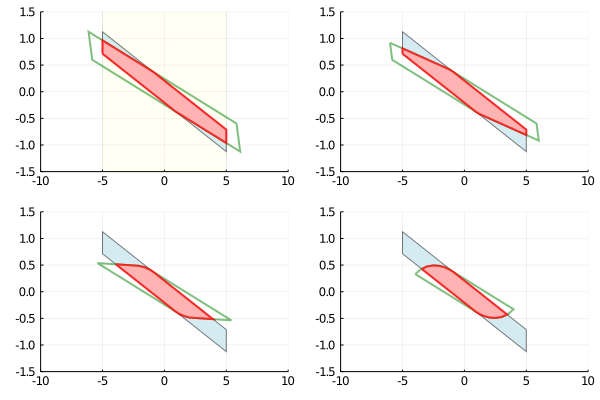

In [3]:
p1 = plot(X1, alpha=0.05, color=:yellow)
        plot!(X_feas, color=:lightblue)
        plot!(X_pre_1, fill=(0.0), line = (1, 2, :green))
        plot!(Ω_1, fill=(1.0, :white), line = (1, 2, :red))
        plot!(Ω_1, fill=(0.3, :red), line = (1, 2, :red))
        xlims!((-10,10))
        ylims!((-1.5,1.5))
    p2 = plot(X_feas, color=:lightblue)
        plot!(X_pre_2, fill=(0.0), line = (1, 2, :green))
        plot!(Ω_2, fill=(1.0, :white), line = (1, 2, :red))
        plot!(Ω_2, fill=(0.3, :red), line = (1, 2, :red))
        xlims!((-10,10))
        ylims!((-1.5,1.5))
    p4 = plot(X_feas, color=:lightblue)
        plot!(X_pre_4, fill=(0.0), line = (1, 2, :green))
        plot!(Ω_4, fill=(1.0, :white), line = (1, 2, :red))
        plot!(Ω_4, fill=(0.3, :red), line = (1, 2, :red))
        xlims!((-10,10))
        ylims!((-1.5,1.5))
    p5 = plot(X_feas, color=:lightblue)
        plot!(X_pre, fill=(0.0), line = (1, 2, :green))
        plot!(Ω, fill=(1.0, :white), line = (1, 2, :red))
        plot!(Ω, fill=(0.3, :red), line = (1, 2, :red))
        xlims!((-10,10))
        ylims!((-1.5,1.5))
plot(p1,p2,p4,p5)

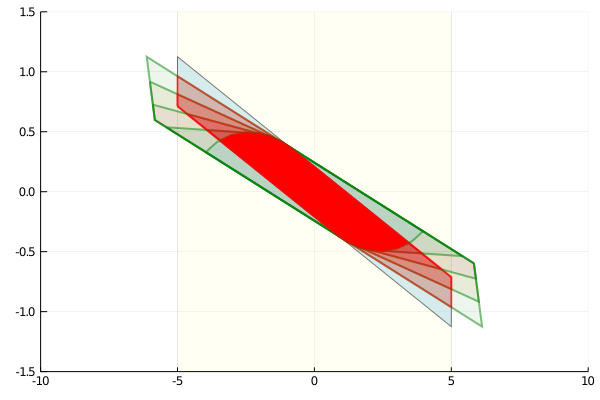

In [4]:
px = plot(X1, alpha=0.05, color=:yellow)
    plot!(X_feas, color=:lightblue)
    plot!(X_pre_1, fill=(0.1), line = (1, 2, :green))
    plot!(Ω_1, fill=(0.2, :red), line = (1, 2, :red))
    plot!(X_pre_2, fill=(0.1), line = (1, 2, :green))
    plot!(Ω_2, fill=(0.2, :red), line = (1, 2, :red))
    plot!(X_pre_3, fill=(0.1), line = (1, 2, :green))
    plot!(Ω_3, fill=(0.2, :red), line = (1, 2, :red))
    plot!(X_pre_4, fill=(0.1), line = (1, 2, :green))
    plot!(Ω_4, fill=(0.2, :red), line = (1, 2, :red))
    plot!(X_pre, fill=(0.1), line = (1, 2, :green))
    plot!(Ω, fill=(1.0, :red), line = (1, 2, :red))
    xlims!((-10,10))
    ylims!((-1.5,1.5))

#### Slide 49: Maximum Control invariant sets system  (05_invariance.pdf) ===========

In [5]:
## Slide 49: Maximum Control invariant sets system  (05_invariance.pdf) ===========
A2 = [1.0 1.0; 0.0 1.0]
B2 = Matrix([1.0 0.5]')
n = size(A2,2)
m = size(B2,2)
X2 = BallInf(zeros(n), 5.0)
U2 = BallInf(zeros(m), 1.0)
Ω19 = maximum_control_invariant_set(A2, B2, X2, U2, 19)
pre_set = InvariantSets._preset_vrep(A2, B2, U2, Ω19)
Ω = maximum_control_invariant_set(A2, B2, X2, U2, 20);

Convergence at iteration : 7
Convergence at iteration : 7


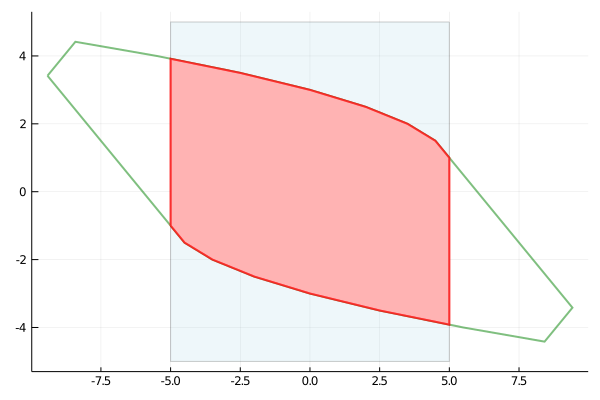

In [6]:
plot(X2, color=:lightblue, alpha=0.2)
    plot!(pre_set, fill=(0.0), line = (1, 2, :green))
    plot!(Ω, fill=(1.0, :white), line = (1, 2, :red))
    plot!(Ω, fill=(0.3, :red), line = (1, 2, :red))

Convergence at iteration : 7
Convergence at iteration : 7
Convergence at iteration : 7
Convergence at iteration : 7
Convergence at iteration : 7
Convergence at iteration : 7
Convergence at iteration : 7


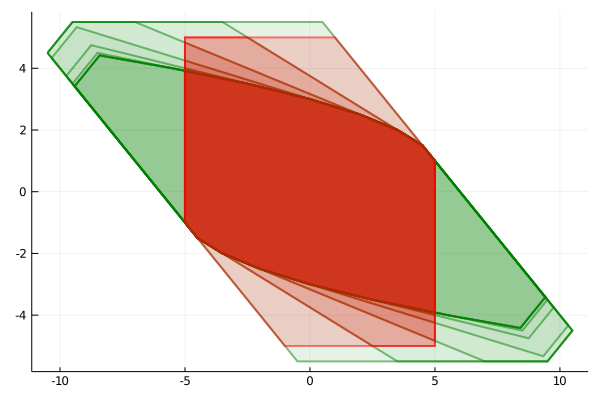

In [7]:
plot(InvariantSets._preset_vrep(A2, B2, U2, X2), fill=(0.1, :green), line = (1, 2, :green))
for i=1:10
    if i!=1
        S = maximum_control_invariant_set(A2, B2, X2, U2, i-1)
        pre_set = InvariantSets._preset_vrep(A2, B2, U2, S)
        plot!(pre_set,fill=(0.05, :green), line = (1, 2, :green))
    end
    S = maximum_control_invariant_set(A2, B2, X2, U2, i)
    plot!(S; fill=(0.15, :red), line = (0.5, 2, :red))
end
plot!()

#### Slide 19: State Space Evolution  (05_invariance.pdf) ===========

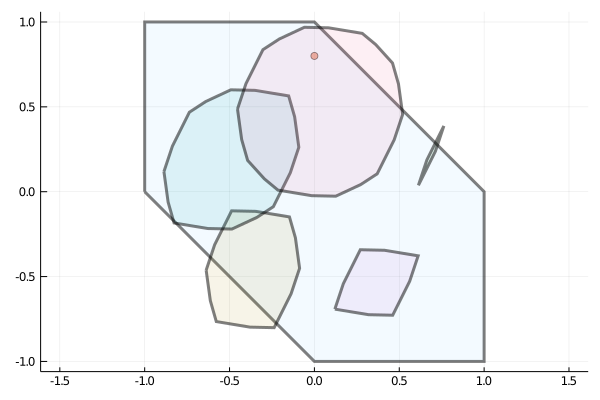

In [8]:
𝕏1 = Hyperrectangle(low=-[1.0, 1.0], high=[1.0, 1.0])
𝕏2 = HPolyhedron([1.0 1.0; -1.0 -1.0], [1.0,1.0])
X = 𝕏1 ∩ᶜ 𝕏2
U = BallInf(zeros(2), 0.1)
α = 0.3
A = 0.9*[sin(α) cos(α); -cos(α) sin(α)]
B = 0.25*[1 2; 3 4]
x0 = [0.0, 0.8]
l = 6
x = Vector{LazySet}(undef,l)
x[1] = Singleton(x0)
plot(X, fill = (0.05), line=(3))
for i=1:l-1
    # x[i+1] = A*x[i] + B*U # lazy
    x[i+1] = A*ᶜx[i] +ᶜ B*ᶜU # concrete
    plot!(x[i], fill=(0.1), line=(3))
end
plot!(x[l]; fill=(0.1), line=(3), aspectratio=1)
